## Intro to NLP in Python

### Regex
Regular Expressions 'regex' allow you to perform various operations on strings, e.g. splitting, replacement, parsing. Some common patterns include:
- \w+, matches a word
- \d, matches any digit
- .*, matches wildcards
- \s, matches space
- '+' or *, are greedy, matching repeats 
- Changing regex symbol to capitals e.g. \S negates the match 
- [a-z], bracketing creates groups (e.g. all lowercase letters)

In [1]:
%matplotlib inline

In [46]:
#Importing the required modules
import re
import matplotlib.pyplot as plt
import nltk
import spacy
from nltk.stem import WordNetLemmatizer
from collections import Counter, defaultdict
import pandas as pd, numpy as np

In [34]:
#ML modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [3]:
#Reading in the data
with open('toafk_c1.txt', 'r') as file:
    chapter_one = file.read().replace('\n', '')

#### Examples
Here's a sample string:

In [3]:
##A string to test
ex_str = """'Let's have a think about what to do', said Merlyn. 
'There are 3 crocs, 2 sparrows and a caterpillar.
If we take them to the King he may add them to the Royal Menagerie'."""

In [10]:
#Finding sentences
sentences = r"[.?!]"
(re.split(sentences, ex_str))

["'Let's have a think about what to do', said Merlyn",
 " \n'There are 3 crocs, 2 sparrows and a caterpillar",
 "\nIf we take them to the King he may add them to the Royal Menagerie'",
 '']

In [11]:
#Finding capitalized words
caps = r"[A-Z]\w+"
print(re.findall(caps, ex_str))

['Let', 'Merlyn', 'There', 'If', 'King', 'Royal', 'Menagerie']


In [12]:
#Finding spaces
spaces = r"\s+"
print(re.split(spaces, ex_str))

["'Let's", 'have', 'a', 'think', 'about', 'what', 'to', "do',", 'said', 'Merlyn.', "'There", 'are', '3', 'crocs,', '2', 'sparrows', 'and', 'a', 'caterpillar.', 'If', 'we', 'take', 'them', 'to', 'the', 'King', 'he', 'may', 'add', 'them', 'to', 'the', 'Royal', "Menagerie'."]


In [13]:
#Extracting digits
digs = r"\d+"
print(re.findall(digs, ex_str))

['3', '2']


#### Tokenization

Tokenization breaks strings into tokens, essentially smaller pieces of the original string.
NLTK is a useful toolkit for processing token, some examples are given below:

In [11]:
#Breaking scene one into sentences
sentences = nltk.sent_tokenize(chapter_one)

In [12]:
sentences[1:4]

['The governess was always getting muddled with her astrolabe, and when she got specially muddled she would take it out of the Wart by rapping his knuckles.',
 "She did not rap Kay's knuckles, because when Kay grew older he would be Sir Kay, the master of the estate.",
 'The Wart was called the Wart because it more or less rhymed with Art, which was short for his real name.']

In [13]:
#Breaking sentences into words
words = nltk.word_tokenize(sentences[4])

In [15]:
#Unique tokens across across entire chapter
unique_tokens = set(nltk.word_tokenize(chapter_one))

**Re.match() vs Re.search()**

re.match() searches for whole words or the beginning of a string, whereas re.search() searches all parts of the string. Examples below:

In [16]:
#Finding the location of a word in a doc
match = re.search('astrolabe', chapter_one)

print(match.start(), match.end())

210 219


In [17]:
#Finding anything in square brackets
p1 = r"\[.*\]"
print(re.search(p1, chapter_one))

None


In [18]:
#Example string
ex_string2 = """
Crier#2: Hark! The King cometh, lay down your weapons and kneel.
"""

In [20]:
#Pattern to find groups of token, including the hash symbol
pattern = r"(\w+|#\d|\?|!)"
nltk.regexp_tokenize(ex_string2, pattern)

['Crier',
 '#2',
 'Hark',
 '!',
 'The',
 'King',
 'cometh',
 'lay',
 'down',
 'your',
 'weapons',
 'and',
 'kneel']

In [21]:
#Pattern to find only capitals
pattern = r"[A-Z]\w+"
nltk.regexp_tokenize(ex_string2, pattern)

['Crier', 'Hark', 'The', 'King']

In [22]:
#Using list comprehensions to calculate the length of sentences in the play
words = [nltk.regexp_tokenize(s, r"\w+") for s in sentences]
sentence_lengths = [len(w) for w in words]


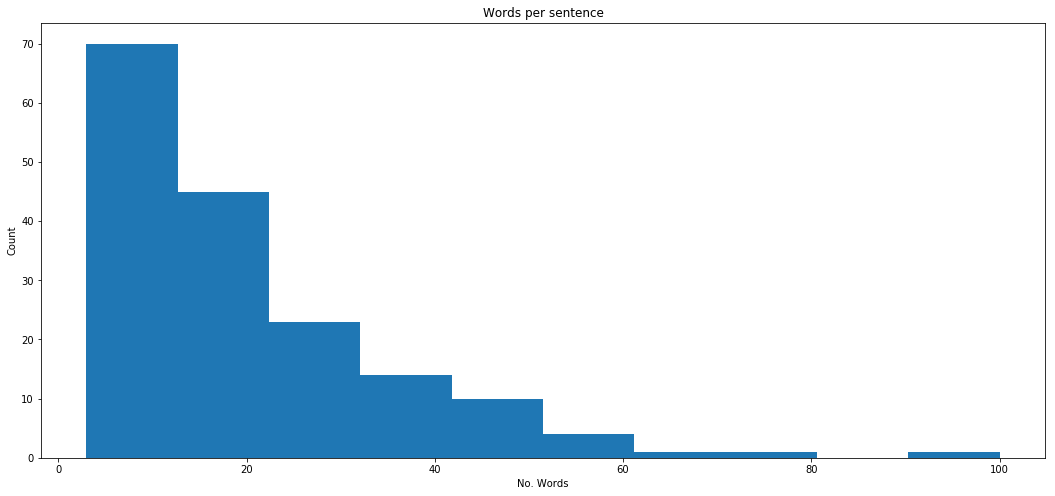

In [23]:
fig, ax = plt.subplots(figsize=(18, 8))
plt.hist(sentence_lengths)
plt.title('Words per sentence')
plt.xlabel('No. Words')
plt.ylabel('Count')
plt.show()

### Bag of words
A useful tool for counting word frequency and assessing text sentiment

Basic bag of words doesn't strip punctuation, is case-sensitive and includes common 'stop words' such as 'the, and, it, by' etc. This can be seen below:

In [3]:
{
    "tags": [
        "removecell",
    ]
}

english_stops = ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 'should',
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 'couldn',
 'didn',
 'doesn',
 'hadn',
 'hasn',
 'haven',
 'isn',
 'ma',
 'mightn',
 'mustn',
 'needn',
 'shan',
 'shouldn',
 'wasn',
 'weren',
 'won',
 'wouldn',
 '']

In [24]:
#Basic bag of words
tokens = nltk.word_tokenize(chapter_one)
#Convert to lower case
lc = [t.lower() for t in tokens]
count = Counter(lc)
count.most_common(10)

[(',', 246),
 ('the', 226),
 ('.', 160),
 ('and', 105),
 ('``', 92),
 ('to', 82),
 ('a', 82),
 ('was', 78),
 ('of', 73),
 ('it', 53)]

In [25]:
#Pre-processing
#keeping only alphabetics
alphas = [t for t in lc if t.isalpha()]
#Removing stop words
stop_strip = [t for t in alphas if t not in english_stops]
#Initialising lemmatizer
wnl = WordNetLemmatizer()
lemd = [wnl.lemmatize(t) for t in stop_strip]
#Creating a word counter and displaying the most common words
bow = Counter(lemd)
bow.most_common(10)

[('sir', 40),
 ('ector', 27),
 ('said', 27),
 ('kay', 21),
 ('grummore', 15),
 ('wart', 13),
 ('boy', 13),
 ('like', 12),
 ('would', 9),
 ('one', 9)]

### TF-IDF: Term Frequency - Inverse Document Frequency
Used to pull out important terms from a document above and beyond what we expect the document to feature

### Named Entity Recognition
Identifies important named entities in documents

In [54]:
#Breaking chapters into constituent tokens
sentences = nltk.sent_tokenize(chapter_one)

In [55]:
#Breaking sentences into words
sent_tokes = [nltk.word_tokenize(sent) for sent in sentences]

In [60]:
#Finding the parts of speech using pos_tag'ing.
pos_sent = [nltk.pos_tag(sent) for sent in sent_tokes]

In [63]:
#Breaking them into Named entities and printing them
NE_chunks = nltk.ne_chunk_sents(pos_sent, binary = True)

for sent in NE_chunks:
    for chunk in sent:
        if hasattr(chunk, 'label') and chunk.label() == 'NE':
            print(chunk)

(NE Summulae/NNP Logicales/NNP)
(NE Organon/NNP)
(NE Astrology/NNP)
(NE Kay/NNP)
(NE Kay/NNP)
(NE Sir/NNP Kay/NNP)
(NE Wart/NNP)
(NE Art/NNP)
(NE Kay/NNP)
(NE Kay/NNP)
(NE Kay/NNP)
(NE Sir/NNP Ector/NNP)
(NE Kay/NNP)
(NE Fridays/NNP)
(NE Kay/NNP)
(NE Sir/NNP Ector/NNP)
(NE Happiest/NNP)
(NE Future/NNP Simple/NNP)
(NE Ector/NNP)
(NE Rattlin/NNP)
(NE Sir/NNP Bruce/NNP Saunce/NNP Pité/NNP)
(NE Weedon/NNP Bushes/NNP)
(NE Mixbury/NNP Plantation/NNP)
(NE Wicken/NNP Wood/NNP)
(NE Sir/NNP Ector/NNP)
(NE Sir/NNP Grummore/NNP)
(NE Sir/NNP Ector/NNP)
(NE Sir/NNP Grummore/NNP)
(NE Sir/NNP Ector/NNP)
(NE Eton/NNP)
(NE Sir/NNP Grummore/NNP)
(NE Eton/NNP)
(NE College/NNP)
(NE Blessed/JJ Mary/NNP)
(NE Metheglyn/NNP)
(NE Port/NNP)
(NE Sir/NNP Ector/NNP)
(NE Burbly/NNP Water/NNP)
(NE Sir/NNP Grummore/NNP)
(NE Sir/NNP Grummore/NNP)
(NE Sir/NNP Grummore/NNP)
(NE Sir/NNP Ector/NNP)
(NE Sir/NNP Grummore/NNP)
(NE Run/NNP)
(NE Sir/NNP Ector/NNP)
(NE Sir/NNP Grummore/NNP)
(NE Sir/NNP Ector/NNP)
(NE Sir/NNP Gru

In [76]:
#Charting named entity types in the first chapter
##Building a chunked sentence list with non-binary cat names
NE_chunks2 = list(nltk.ne_chunk_sents(pos_sent, binary = False))

In [78]:
##Using a default dict to count, putting 'int' as argument defaults value to 0
ner_cats = defaultdict(int)

for sent in NE_chunks2:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_cats[chunk.label()] += 1

In [80]:
##Creating chart labels and extracting values
labels = list(ner_cats.keys())
values = [ner_cats.get(l) for l in labels]

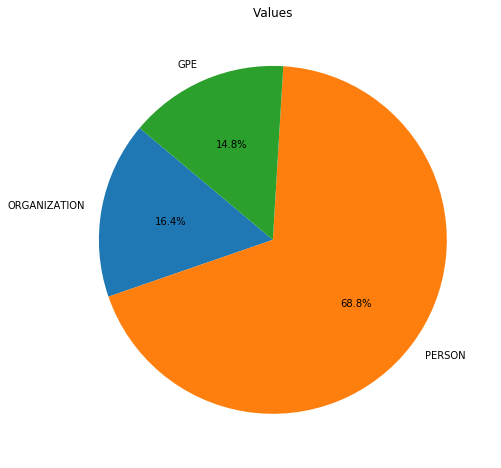

In [84]:
##Plotting
fig, ax = plt.subplots(figsize = (18, 8))
plt.pie(values, labels = labels, autopct = '%1.1f%%', startangle = 140)
plt.title('Proportions of named entities by type')
plt.show()

### Using SPACY

In [26]:
nlp = spacy.load('en', tagger = False, parser = False, matcher = False)

In [27]:
#Reading in the data
with open('tsits.txt', 'r') as file:
    tsits = file.read().replace('\n', '')

In [33]:
doc = nlp(chapter_one)

In [29]:
for ent in doc.ents:
    print(ent.label_, ent.text)

DATE Mondays
DATE Wednesdays and Fridays
ORG Court Hand
ORG Summulae Logicales
DATE the week
GPE Organon
PERSON Kay
PERSON Kay
PERSON Kay
PERSON Wart
PERSON Wart
PERSON Art
PERSON Kay
PERSON Kay
PERSON Kay
PERSON Ector
PERSON Kay
DATE three years
DATE Mondays and Fridays
DATE Tuesdays
DATE Wednesdays
DATE Thursdays
DATE Saturdays
PERSON Kay
PERSON Ector
ORDINAL first
LANGUAGE Latin
TIME five o'clock
PERSON Grummore Grummursum
LAW the Future Simple of Utor
ORDINAL third
CARDINAL ninety-seven
PERSON Ector
PERSON Grummore
PERSON Rattlin
PERSON Bruce Saunce Pité
GPE Weedon Bushes
ORG Mixbury Plantation
GPE Wicken Wood
QUANTITY twenty-five miles
NORP Latin
PERSON Grummore
PERSON Ector
PERSON Grummore
PERSON Ector
PERSON Eton
PERSON Grummore
PERSON Eton
ORG the College of Blessed Mary
DATE 1440
GPE Metheglyn
ORG Port
PERSON Ector
ORG the Burbly Water.""Galapas
PERSON Grummore."That
PERSON Grummore
PERSON Grummore
PERSON Ector
PERSON Grummore
QUANTITY twenty-five miles
PERSON Ector
PERSON Gru

In [35]:
#Creating the same as above, but as a list and then outputting unique values via a set
ent_list = [(ent.label_, ''.join(ent.text)) for ent in doc.ents]

print(set(ent_list))

In [41]:
#Counting number of 'Wart' mentions
count = 0
for ent in doc.ents:
    if 'Wart' in ent.text:
        count += 1
        
print(count)

11


Other libraries to explore: Polyglot(multilanguage), Gensim

### Building ML text classifier Pipelines with SK-Learn

In [22]:
#Loading the Spam Ham dataset
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [23]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [24]:
#Renaming columns and dropping extras
df = df.iloc[:,:2]
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
#Setting up the pipeline
y = df.label
#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], y, test_size = .33, random_state = 42)
#Initialize CountVectoriser
cou_vec = CountVectorizer(stop_words = 'english')
#Transform training data
count_train = cou_vec.fit_transform(X_train.values)
#Transform test data
count_test = cou_vec.transform(X_test.values)

In [29]:
cou_vec.get_feature_names()[:5]

['00', '000', '000pes', '008704050406', '0089']

In [31]:
#Setting up a similar pipeline but with a Tfidf vectorizer
tfidf_vec = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
#Transform training data
cou_tfi_train = tfidf_vec.fit_transform(X_train.values)
#Transform test data
cou_tfi_test = tfidf_vec.transform(X_test.values)

In [32]:
tfidf_vec.get_feature_names()[:5]

['00', '000', '000pes', '008704050406', '0089']

In [33]:
cou_tfi_train.A[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
#Building the classifier using multinomial naive bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, Y_train)
pred = nb_classifier.predict(count_test)

In [38]:
#Evaluating performance
score = metrics.accuracy_score(Y_test, pred)
print(score)

0.9815116911364872


In [40]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred, labels = ['spam', 'ham'])
print(confusion_matrix)

[[ 231   21]
 [  13 1574]]


In [42]:
#Running the same pipeline but with the tfidf approach
nb_classifier2 = MultinomialNB()
nb_classifier2.fit(cou_tfi_train, Y_train)
pred2 = nb_classifier2.predict(cou_tfi_test)

In [43]:
#Performance eval
score = metrics.accuracy_score(Y_test, pred2)
print(score)

0.967373572593801


In [44]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred2, labels = ['spam', 'ham'])
print(confusion_matrix)

[[ 192   60]
 [   0 1587]]


In [47]:
#Varying alpha values 
alphas = np.arange(start = 0, stop = 1, step = 0.1)

def train_and_predict(alpha):
    nb_cl = MultinomialNB(alpha = alpha)
    nb_cl.fit(cou_tfi_train, Y_train)
    pred = nb_cl.predict(cou_tfi_test)
    score = metrics.accuracy_score(Y_test, pred)
    return score

In [48]:
for a in alphas:
    print('Alpha: ', a)
    print('Score: ', train_and_predict(a))
    print()

Alpha:  0.0
Score:  0.9749864056552474

Alpha:  0.1
Score:  0.9809679173463839

Alpha:  0.2
Score:  0.9825992387166939

Alpha:  0.30000000000000004
Score:  0.9793365959760739

Alpha:  0.4
Score:  0.977705274605764

Alpha:  0.5
Score:  0.9771615008156607

Alpha:  0.6000000000000001
Score:  0.9760739532354541

Alpha:  0.7000000000000001
Score:  0.9755301794453507

Alpha:  0.8
Score:  0.9711799891245242

Alpha:  0.9
Score:  0.9695486677542142



/home/luco17/Documents/test_area/DCMP/dcmp-env/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [51]:
#Extracting values to see what did what in the model
class_labels = nb_classifier.classes_
feature_names = cou_vec.get_feature_names()
feat_weights = sorted(zip(nb_classifier.coef_[0], feature_names))
print(class_labels[0], feat_weights[:20])

ham [(-9.588160179264023, '000pes'), (-9.588160179264023, '0125698789'), (-9.588160179264023, '0quit'), (-9.588160179264023, '1030'), (-9.588160179264023, '1120'), (-9.588160179264023, '116'), (-9.588160179264023, '1205'), (-9.588160179264023, '128'), (-9.588160179264023, '130'), (-9.588160179264023, '15'), (-9.588160179264023, '15pm'), (-9.588160179264023, '1hr'), (-9.588160179264023, '1mega'), (-9.588160179264023, '1pm'), (-9.588160179264023, '1stone'), (-9.588160179264023, '1thing'), (-9.588160179264023, '255'), (-9.588160179264023, '2getha'), (-9.588160179264023, '2geva'), (-9.588160179264023, '2go')]


In [52]:
print(class_labels[1], feat_weights[-20:])

spam [(-5.826960063570461, '50'), (-5.826960063570461, 'urgent'), (-5.781497689493703, 'nokia'), (-5.781497689493703, 'win'), (-5.7595187827749275, 'new'), (-5.738012577553964, 'send'), (-5.716959168356132, 'uk'), (-5.636916460682595, 'just'), (-5.562808488528873, 'cash'), (-5.545108911429472, 'won'), (-5.44502545287249, 'prize'), (-5.413772909368386, 'reply'), (-5.383467559873057, 'www'), (-5.218712326797001, 'claim'), (-5.157343380420709, 'stop'), (-5.157343380420709, 'text'), (-5.122252060609439, 'ur'), (-5.110823364785816, 'mobile'), (-4.869661307968928, 'txt'), (-4.531914373915715, 'free')]
